### Pregunta 1 de 2                                                                                  10 Puntos

Analizar los datos (realizar la exploración y el pre-procesamiento) y aplicar algoritmos de clasificación (Árboles de Decisión, Random Forest) al archivo clima_aeropuerto_lima.csv, el cual contiene información del clima en el aeropuerto Jorge Chavez.

Resolver las siguientes preguntas:

- ¿Qué resultados se han encontrado de la exploración y pre-procesamiento de los datos? Explicar
- ¿Qué es una matriz de confusión? Y expresar los resultados obtenidos.
- Aplicar los modelos de clasificación revisados en el curso y explicar el mejor modelo obtenido con los mejores parámetros (explicar el resultado de las métricas obtenidas)
- ¿Qué criterios se puede considerar para comparar los modelos obtenidos? Seleccionar el mejor modelo.
- Identificar las variables que tienen mayor relevancia para predecir el clima.
``` &#8203;:citation[oaicite:0]{index=0}&#8203;


In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [206]:
df = pd.read_csv('Clima_Aeropuerto_Lima.csv')

In [207]:
df.dtypes

name                       object
datetime                   object
maxC                      float64
minC                      float64
rocioC                    float64
hum_rel                   float64
velo_vien_kph             float64
vien_grad_sex             float64
nubosidad_por             float64
radiac_solar_watios_m2    float64
energ_solar_MJ_m2         float64
clase_hoy                  object
clase_manana               object
dtype: object

In [208]:
df.describe()

,maxC,minC,rocioC,hum_rel,velo_vien_kph,vien_grad_sex,nubosidad_por,radiac_solar_watios_m2,energ_solar_MJ_m2
count,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000,3480.000000
mean,22.730718,18.130575,16.661437,81.670144,20.362730,185.000489,82.571264,250.213937,21.611149
std,3.471324,2.400643,2.350197,3.882370,4.940217,23.833039,16.074730,59.199685,5.115227
min,16.000000,2.000000,12.100000,65.600000,9.400000,153.900000,20.500000,0.000000,0.000000
25%,20.000000,16.000000,14.600000,79.200000,16.600000,170.800000,72.200000,224.900000,19.400000
50%,22.100000,18.000000,16.500000,81.700000,20.500000,177.700000,84.900000,253.300000,21.900000
75%,25.100000,20.000000,18.500000,84.300000,24.100000,189.000000,97.925000,290.000000,25.100000
max,33.100000,25.100000,22.900000,94.100000,54.000000,322.200000,100.000000,354.900000,30.600000


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    3480 non-null   object 
 1   datetime                3480 non-null   object 
 2   maxC                    3480 non-null   float64
 3   minC                    3480 non-null   float64
 4   rocioC                  3480 non-null   float64
 5   hum_rel                 3480 non-null   float64
 6   velo_vien_kph           3480 non-null   float64
 7   vien_grad_sex           3480 non-null   float64
 8   nubosidad_por           3480 non-null   float64
 9   radiac_solar_watios_m2  3480 non-null   float64
 10  energ_solar_MJ_m2       3480 non-null   float64
 11  clase_hoy               3480 non-null   object 
 12  clase_manana            3480 non-null   object 
dtypes: float64(9), object(4)
memory usage: 353.6+ KB


In [210]:
# Desarrollar un modelo predictivo para detectar la fuga de clientes de una empresa de telecomunicaciones

# y (variable dependiente) : clase_manana
# Xs (variables independientes) : Todas menos clase_manana

In [211]:
df["clase_manana"].value_counts(normalize = True) * 100 # Diferencia de 66.66666% y 33.333333%

clase_manana
parcialmente_nublado    41.005747
nublado                 31.724138
lluvioso                27.270115
Name: proportion, dtype: float64

In [212]:
# Se tiene nublado el 31%, mientras que parcialmente nublado el 41% y lluvioso el 27%

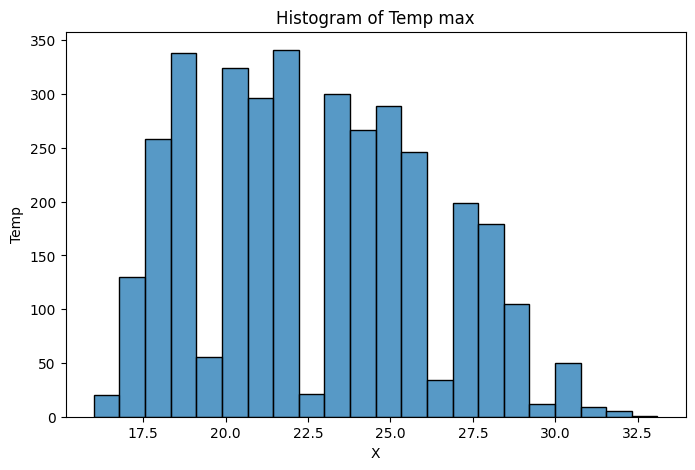

In [213]:
# Create a histogram for attribute1
plt.figure(figsize=(8, 5))
sns.histplot(df['maxC'], bins=22, kde=False)
plt.xlabel('X')
plt.ylabel('Temp')
plt.title('Histogram of Temp max')
plt.show()

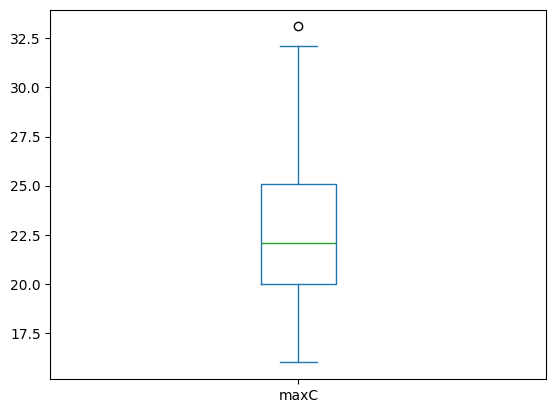

In [214]:
df['maxC'].plot.box()

plt.show()

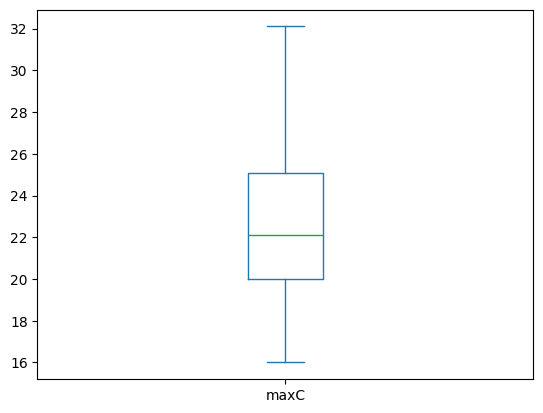

In [215]:
# Identify outliers based on the boxplot (e.g., data points outside the whiskers)
outliers = df[df['maxC'] < df['maxC'].quantile(0.25) - 1.5 * (df['maxC'].quantile(0.75) - df['maxC'].quantile(0.25))]
outliers2 = df[df['maxC'] > df['maxC'].quantile(0.75) + 1.5 * (df['maxC'].quantile(0.75) - df['maxC'].quantile(0.25))]

# Use concat to combine the outlier dataframes
outliers = pd.concat([outliers, outliers2])

# Remove outliers from the DataFrame
df_cleaned = df[~df.index.isin(outliers.index)]

df_cleaned['maxC'].plot.box()
plt.show()

In [216]:
df = df_cleaned

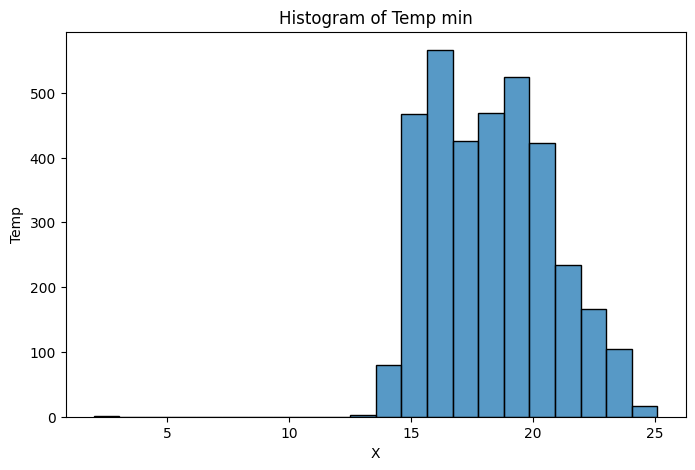

In [217]:
# Create a histogram for attribute1
plt.figure(figsize=(8, 5))
sns.histplot(df['minC'], bins=22, kde=False)
plt.xlabel('X')
plt.ylabel('Temp')
plt.title('Histogram of Temp min')
plt.show()

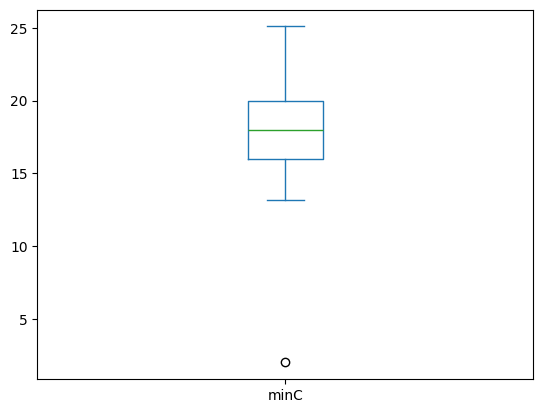

In [218]:
df['minC'].plot.box()

plt.show()

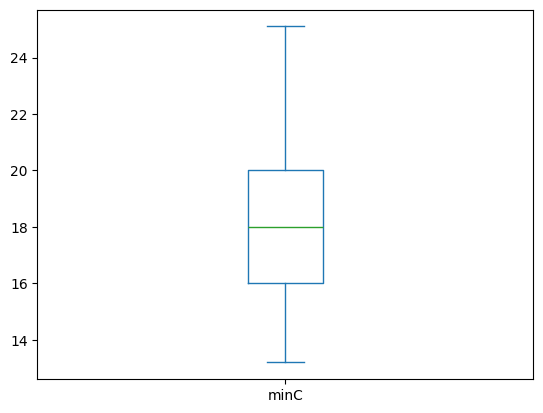

In [219]:
# Identify outliers based on the boxplot (e.g., data points outside the whiskers)
outliers = df[df['minC'] < df['minC'].quantile(0.25) - 1.5 * (df['minC'].quantile(0.75) - df['minC'].quantile(0.25))]
outliers2 = df[df['minC'] > df['minC'].quantile(0.75) + 1.5 * (df['minC'].quantile(0.75) - df['minC'].quantile(0.25))]

# Use concat to combine the outlier dataframes
outliers = pd.concat([outliers, outliers2])

# Remove outliers from the DataFrame
df_cleaned = df[~df.index.isin(outliers.index)]

df_cleaned['minC'].plot.box()
plt.show()

In [220]:
df = df_cleaned

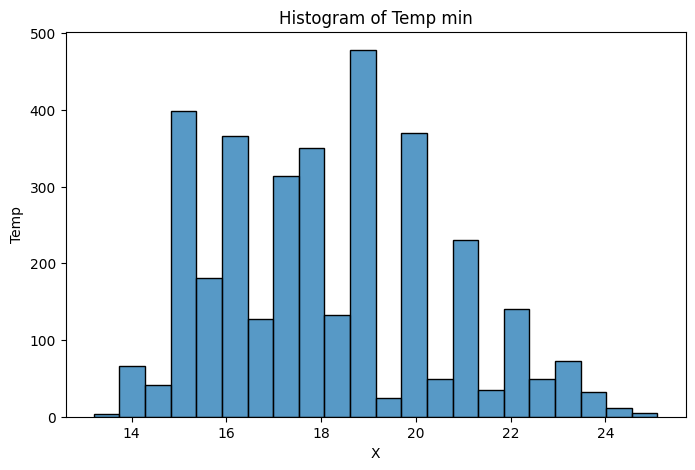

In [221]:
# Create a histogram for attribute1
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['minC'], bins=22, kde=False)
plt.xlabel('X')
plt.ylabel('Temp')
plt.title('Histogram of Temp min')
plt.show()

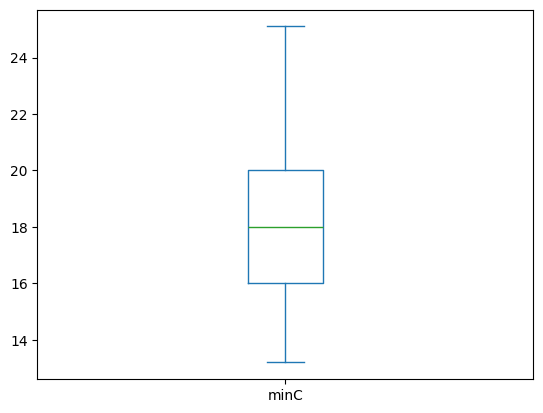

In [222]:
df_cleaned['minC'].plot.box()

plt.show()

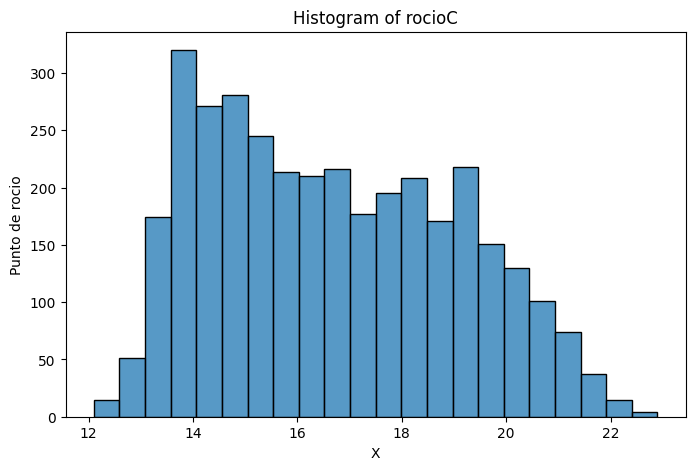

In [223]:
# Create a histogram for attribute1
plt.figure(figsize=(8, 5))
sns.histplot(df['rocioC'], bins=22, kde=False)
plt.xlabel('X')
plt.ylabel('Punto de rocio')
plt.title('Histogram of rocioC')
plt.show()

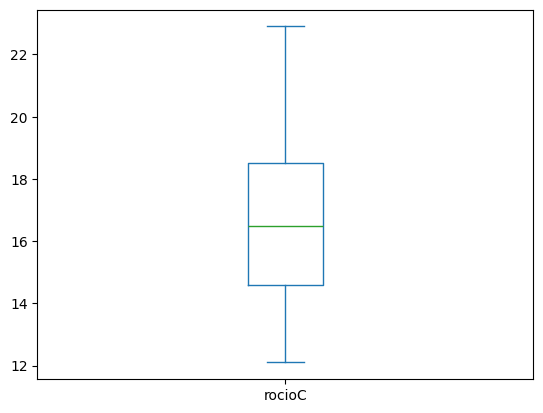

In [224]:
df['rocioC'].plot.box()

plt.show()

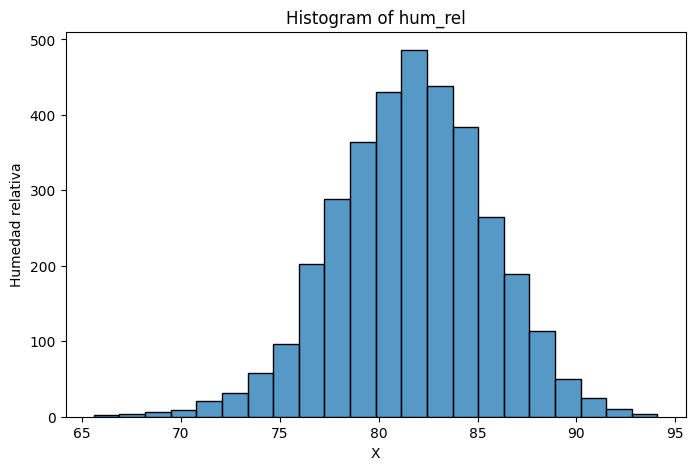

In [225]:
# Create a histogram for attribute1
plt.figure(figsize=(8, 5))
sns.histplot(df['hum_rel'], bins=22, kde=False)
plt.xlabel('X')
plt.ylabel('Humedad relativa')
plt.title('Histogram of hum_rel')
plt.show()

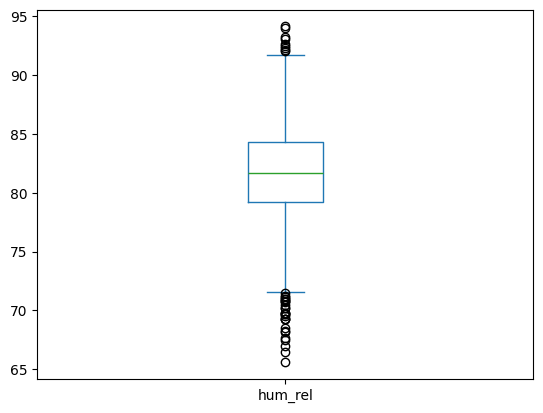

In [226]:
df['hum_rel'].plot.box()

plt.show()

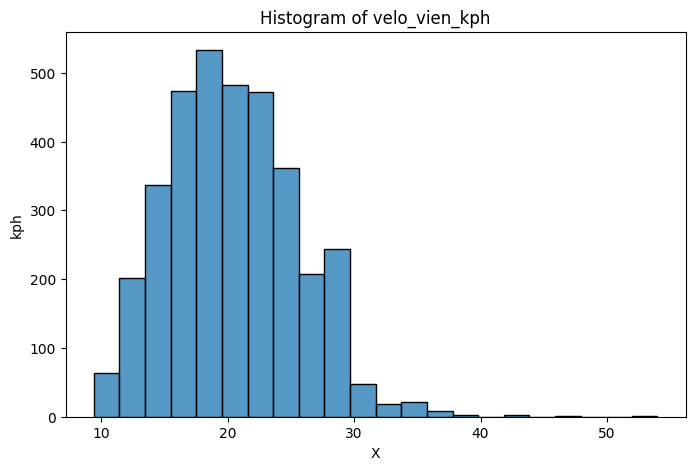

In [227]:
# Create a histogram for attribute1
plt.figure(figsize=(8, 5))
sns.histplot(df['velo_vien_kph'], bins=22, kde=False)
plt.xlabel('X')
plt.ylabel('kph')
plt.title('Histogram of velo_vien_kph')
plt.show()

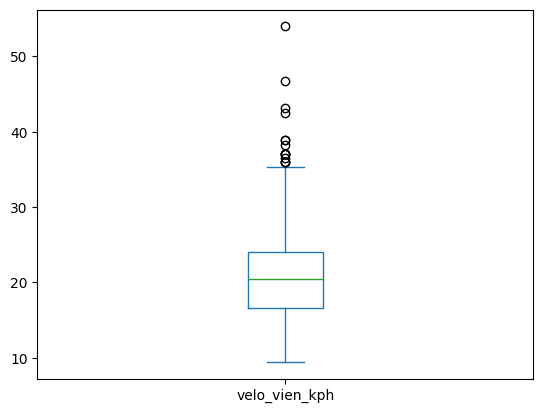

In [228]:
df['velo_vien_kph'].plot.box()
plt.show()

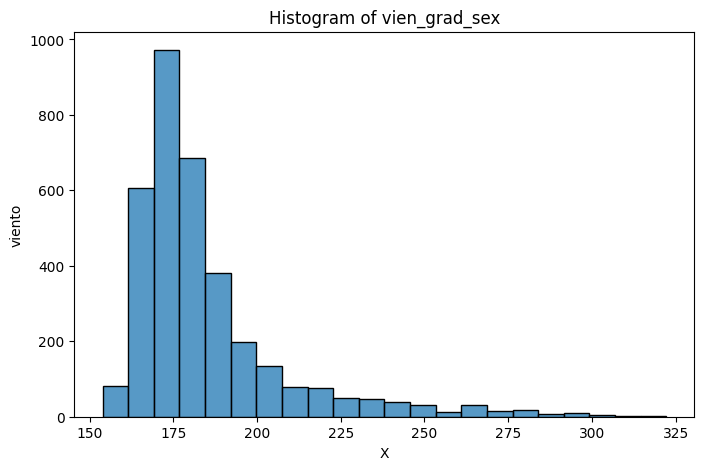

In [229]:
# Create a histogram for attribute1
plt.figure(figsize=(8, 5))
sns.histplot(df['vien_grad_sex'], bins=22, kde=False)
plt.xlabel('X')
plt.ylabel('viento')
plt.title('Histogram of vien_grad_sex')
plt.show()

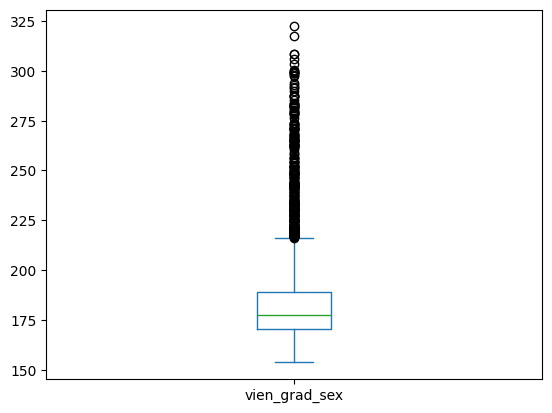

In [230]:
df['vien_grad_sex'].plot.box()
plt.show()

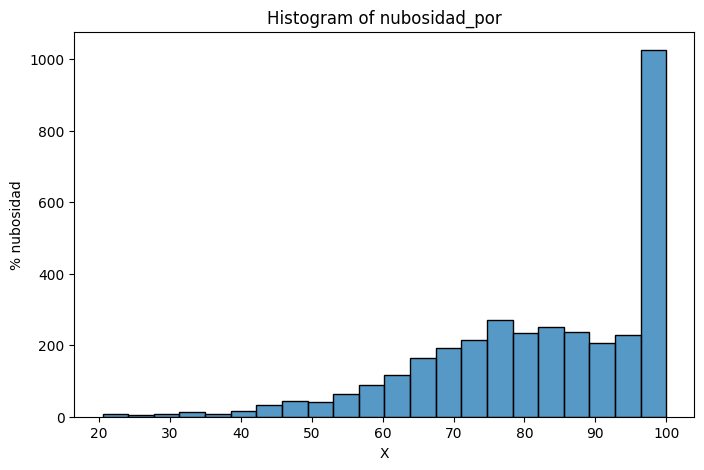

In [231]:
# Create a histogram for attribute1
plt.figure(figsize=(8, 5))
sns.histplot(df['nubosidad_por'], bins=22, kde=False)
plt.xlabel('X')
plt.ylabel('% nubosidad')
plt.title('Histogram of nubosidad_por')
plt.show()

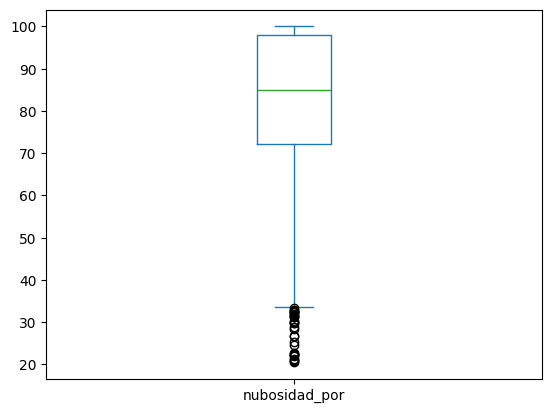

In [232]:
df['nubosidad_por'].plot.box()
plt.show()

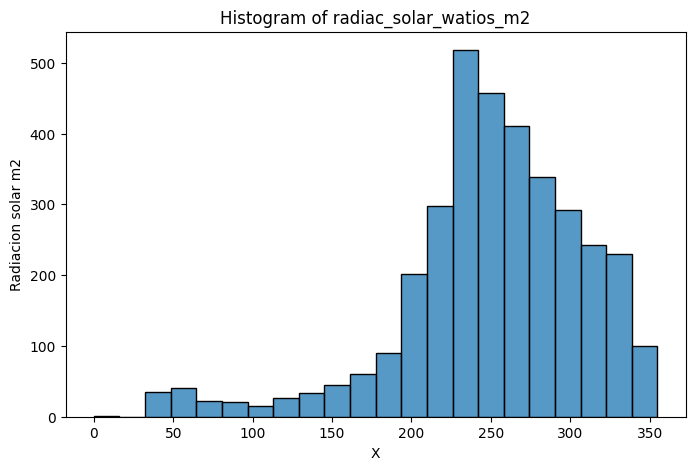

In [233]:
# Create a histogram for attribute1
plt.figure(figsize=(8, 5))
sns.histplot(df['radiac_solar_watios_m2'], bins=22, kde=False)
plt.xlabel('X')
plt.ylabel('Radiacion solar m2')
plt.title('Histogram of radiac_solar_watios_m2')
plt.show()

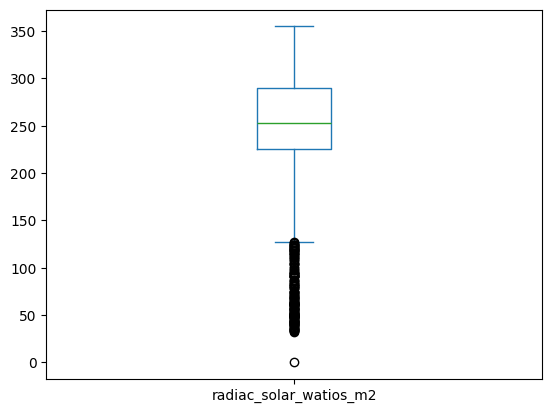

In [234]:
df['radiac_solar_watios_m2'].plot.box()
plt.show()

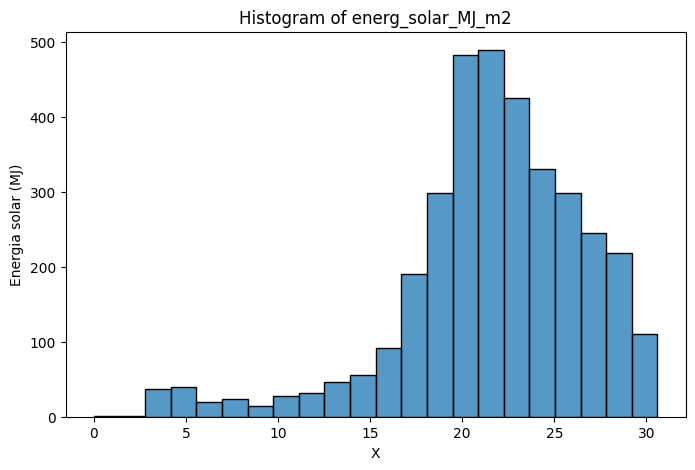

In [235]:
# Create a histogram for attribute1
plt.figure(figsize=(8, 5))
sns.histplot(df['energ_solar_MJ_m2'], bins=22, kde=False)
plt.xlabel('X')
plt.ylabel('Energia solar (MJ)')
plt.title('Histogram of energ_solar_MJ_m2')
plt.show()

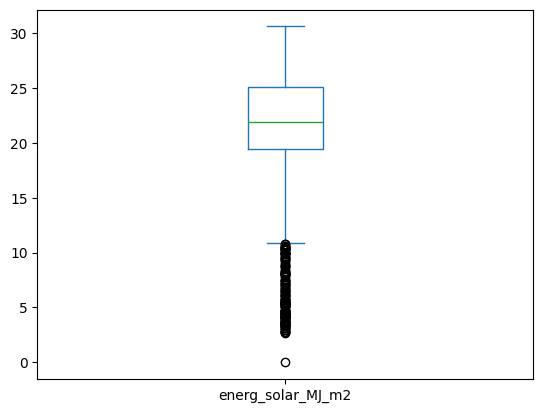

In [236]:
df['energ_solar_MJ_m2'].plot.box()
plt.show()

In [237]:
df.name.unique() # al ser un valor constante vamos a eliminar la columna

array(['Lima'], dtype=object)

In [238]:
df.clase_hoy.unique()

array(['nublado', 'parcialmente_nublado', 'lluvioso'], dtype=object)

In [239]:
df.drop(['datetime','name'],inplace = True,axis =1) 

### Resumend e data cleaning
* Se realiza la limpieza de oulayers de las variables de minC y maxC
* El resto de variables de mantienen como tal


In [240]:
# para clase_hoy y clase_mañana vamos a cambiarlas a variables categoricas
# nublado                     = 0
# parcialmente_nublado        = 1
# lluvioso                    = 2

df['clase_hoy'] = df['clase_hoy'].apply(lambda x: 0 if x == "nublado" else (1 if x == "parcialmente_nublado" else 2))

In [241]:
df['clase_manana'] = df['clase_manana'].apply(lambda x: 0 if x == "nublado" else (1 if x == "parcialmente_nublado" else 2))

In [242]:
df.columns

Index(['maxC', 'minC', 'rocioC', 'hum_rel', 'velo_vien_kph', 'vien_grad_sex',
       'nubosidad_por', 'radiac_solar_watios_m2', 'energ_solar_MJ_m2',
       'clase_hoy', 'clase_manana'],
      dtype='object')

<Axes: >

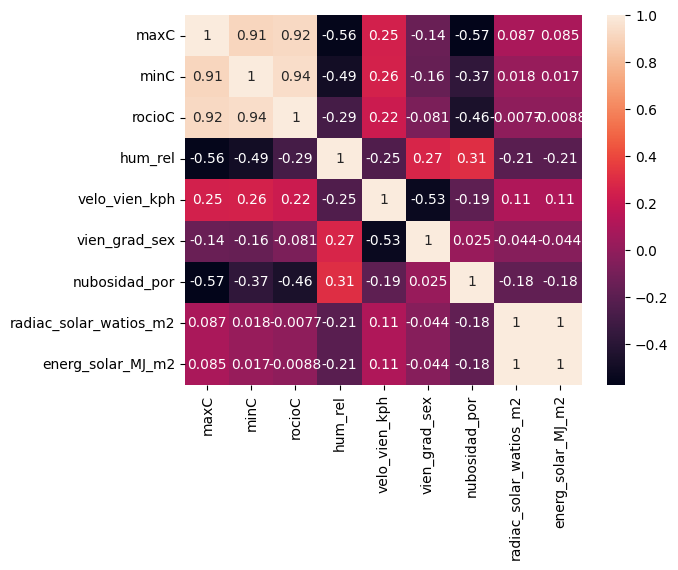

In [243]:
# El coeficiente de correlacion de pearson se analiza SOLO para verificar la RELACION LINEAL entre VARIABLES CUANTITATIVAS
# Si la variable tiene formato numerico pero ORIGINALMENTE es una variable CATEGORICA no aplica para la matriz de correlacion
sns.heatmap(df.loc[:,['maxC', 'minC', 'rocioC', 'hum_rel', 'velo_vien_kph', 'vien_grad_sex',
       'nubosidad_por', 'radiac_solar_watios_m2', 'energ_solar_MJ_m2']].corr(),annot=True)

In [244]:
# las variables maxC, minC, rocioC son variables que estan altamente correlocionadas por lo cual vamos a quedarnos con 1, el promedio de minC y maxC

In [245]:
df['meanC'] = ( df['maxC'] + df['minC'] )/2

In [246]:
df.columns

Index(['maxC', 'minC', 'rocioC', 'hum_rel', 'velo_vien_kph', 'vien_grad_sex',
       'nubosidad_por', 'radiac_solar_watios_m2', 'energ_solar_MJ_m2',
       'clase_hoy', 'clase_manana', 'meanC'],
      dtype='object')

In [247]:
df.drop(['maxC', 'minC', 'rocioC'],inplace = True, axis = 1)

<Axes: >

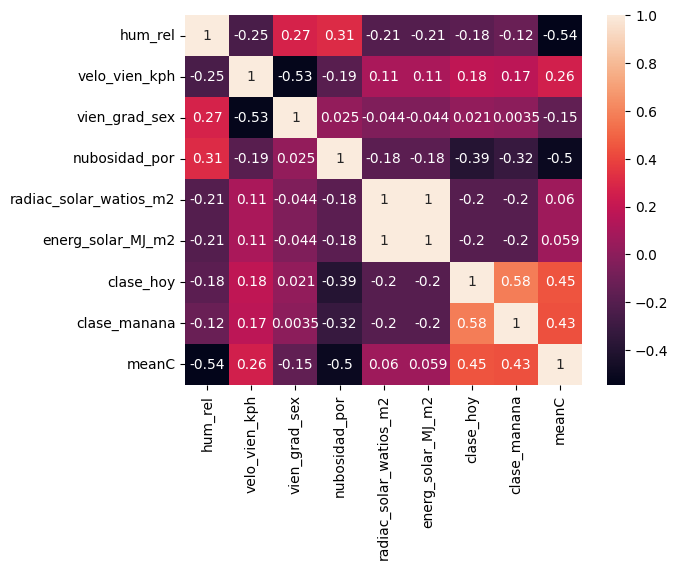

In [248]:
sns.heatmap(df.corr(),annot=True)

In [249]:
df.dtypes

hum_rel                   float64
velo_vien_kph             float64
vien_grad_sex             float64
nubosidad_por             float64
radiac_solar_watios_m2    float64
energ_solar_MJ_m2         float64
clase_hoy                   int64
clase_manana                int64
meanC                     float64
dtype: object

In [250]:
data = df.loc[:, ['hum_rel', 'velo_vien_kph', 'vien_grad_sex',
       'nubosidad_por', 'radiac_solar_watios_m2', 'energ_solar_MJ_m2',
       'clase_hoy',  'meanC']]

In [251]:
label = df.loc[:,'clase_manana']

In [252]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.3)

In [253]:
data.shape

(3478, 8)

In [254]:
X_train.shape

(2434, 8)

In [255]:
X_test.shape

(1044, 8)

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve # ROC a diferencia del accuracy te da un valor justo de precision para datos desbalanceados

In [257]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns

def apply_classifier(clf, xTrain, xTest, yTrain, yTest):
    clf.fit(xTrain, yTrain)  # Entrenamiento del modelo
    predictions = clf.predict(xTest)  # Predicciones en el conjunto de prueba
    conf_mtx = confusion_matrix(yTest, predictions)  # Matriz de confusión

    # Definición del área de visualización (2 gráficas)
    f, axes = plt.subplots(ncols=2, figsize=(15, 5)) 

    # Formato de la matriz de confusión
    sns.heatmap(conf_mtx, annot=True, cbar=False, fmt="g", ax=axes[0])
    axes[0].set_xlabel('Predicted labels')  # Título del eje x
    axes[0].set_ylabel('True labels')  # Título del eje y
    axes[0].set_title('Confusion Matrix Test')  # Título de la matriz de confusión
    axes[0].xaxis.set_ticklabels(['class 0 nublado', 'class 1 parcialmente_nublado', 'class 2 lluvioso'])  # Etiquetas del eje x
    axes[0].yaxis.set_ticklabels(['class 0 nublado', 'class 1 parcialmente_nublado', 'class 2 lluvioso'])  # Etiquetas del eje y

    # Mostrar el reporte de clasificación
    print(classification_report(yTest, predictions)) 

    # Cálculo del AUC para múltiples clases
    yTest_binarized = label_binarize(yTest, classes=[0, 1, 2])
    predictions_binarized = label_binarize(predictions, classes=[0, 1, 2])
    roc_auc = roc_auc_score(yTest_binarized, predictions_binarized, average="macro", multi_class="ovo")
    print("AUC ROC : ", roc_auc)  # Mostrar el resultado del AUC

    # Generación de la curva ROC para múltiples clases
    fpr = dict()
    tpr = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(yTest_binarized[:, i], predictions_binarized[:, i])
        axes[1].plot(fpr[i], tpr[i], label=f'class {i} (auc = {roc_auc:.2f})')

    # Línea diagonal de referencia
    axes[1].plot([0, 1], [0, 1], 'k--')
    axes[1].set_xlabel('False Positive Rate')  # Título del eje x
    axes[1].set_ylabel('True Positive Rate')  # Título del eje y
    axes[1].set_title('ROC')  # Título del gráfico
    plt.legend(loc='lower right')  # Mostrar la leyenda
    plt.show()  # Mostrar las gráficas

# Ejemplo de uso (asegúrate de tener los datos y un clasificador):
# from sklearn.ensemble import RandomForestClassifier
# apply_classifier(RandomForestClassifier(), xTrain, xTest, yTrain, yTest)


In [258]:
decision_tree = DecisionTreeClassifier() # Definir nuestro modelo


              precision    recall  f1-score   support

           0       0.64      0.55      0.59       352
           1       0.60      0.67      0.63       404
           2       0.61      0.61      0.61       288

    accuracy                           0.61      1044
   macro avg       0.62      0.61      0.61      1044
weighted avg       0.62      0.61      0.61      1044

AUC ROC :  0.707040788153329


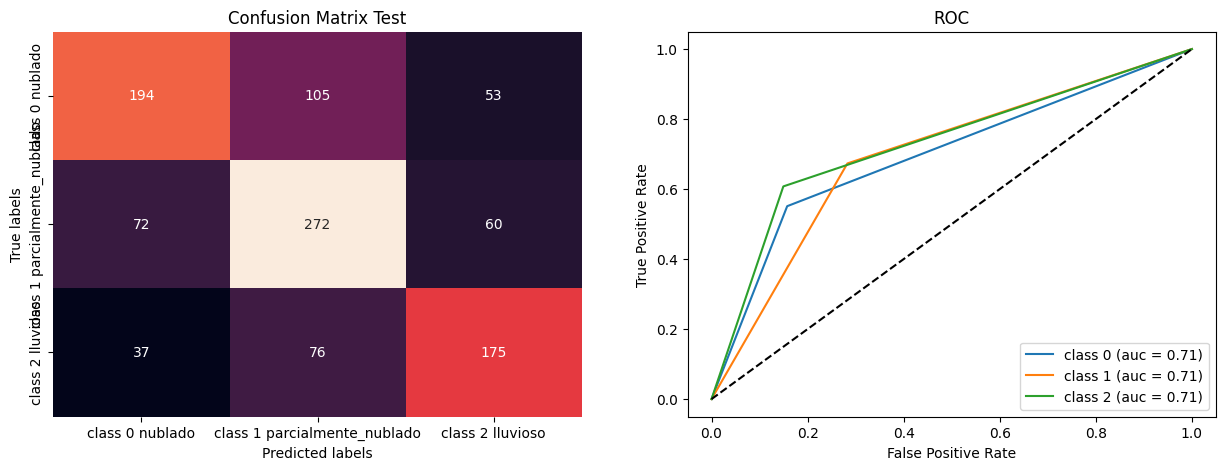

In [259]:
apply_classifier(decision_tree,X_train, X_test, y_train, y_test) # Aplicar la funcion que hemos construido

              precision    recall  f1-score   support

           0       0.72      0.67      0.69       352
           1       0.70      0.77      0.73       404
           2       0.75      0.70      0.72       288

    accuracy                           0.72      1044
   macro avg       0.72      0.71      0.72      1044
weighted avg       0.72      0.72      0.72      1044

AUC ROC :  0.7847415138224529


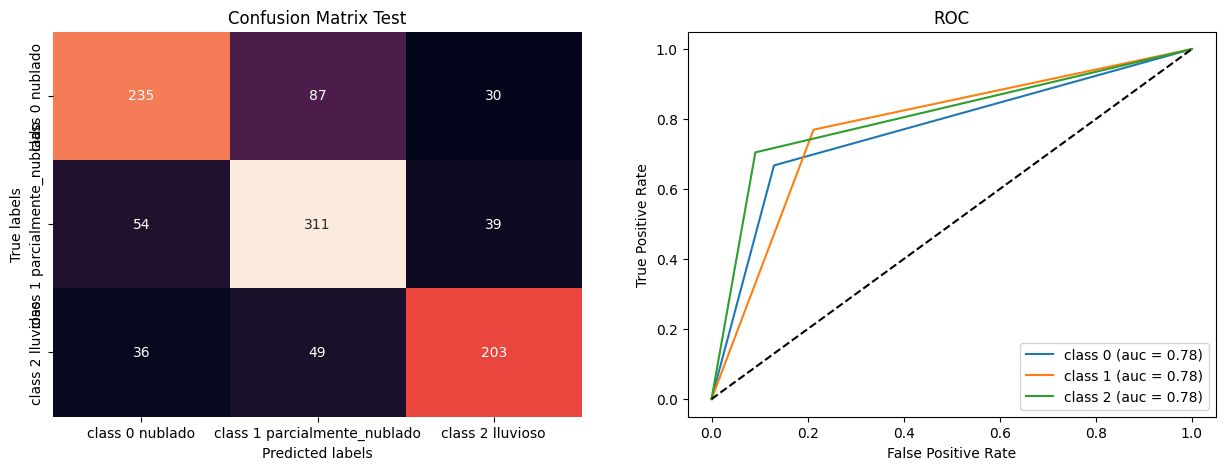

In [260]:
random_forest = RandomForestClassifier(random_state = 42)
apply_classifier(random_forest,X_train, X_test, y_train, y_test)